# Diabetes Prediction



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
dataset=pd.read_csv('diabetes.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
dataset['Insulin'].replace(0,np.NaN, inplace= True)
dataset['Glucose'].replace(0, np.nan, inplace= True)
dataset['BloodPressure'].replace(0, np.nan, inplace= True)
dataset['SkinThickness'].replace(0, np.nan, inplace= True)
dataset['BMI'].replace(0, np.nan, inplace= True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
dataset['Insulin']=dataset['Insulin'].fillna(dataset['Insulin'].mode()[0])
dataset['BMI']=dataset['BMI'].fillna(dataset['BMI'].mode()[0])
dataset['SkinThickness']=dataset['SkinThickness'].fillna(dataset['SkinThickness'].mode()[0])
dataset['BloodPressure']=dataset['BloodPressure'].fillna(dataset['BloodPressure'].mode()[0])
dataset['Glucose']=dataset['Glucose'].fillna(dataset['Glucose'].mode()[0])

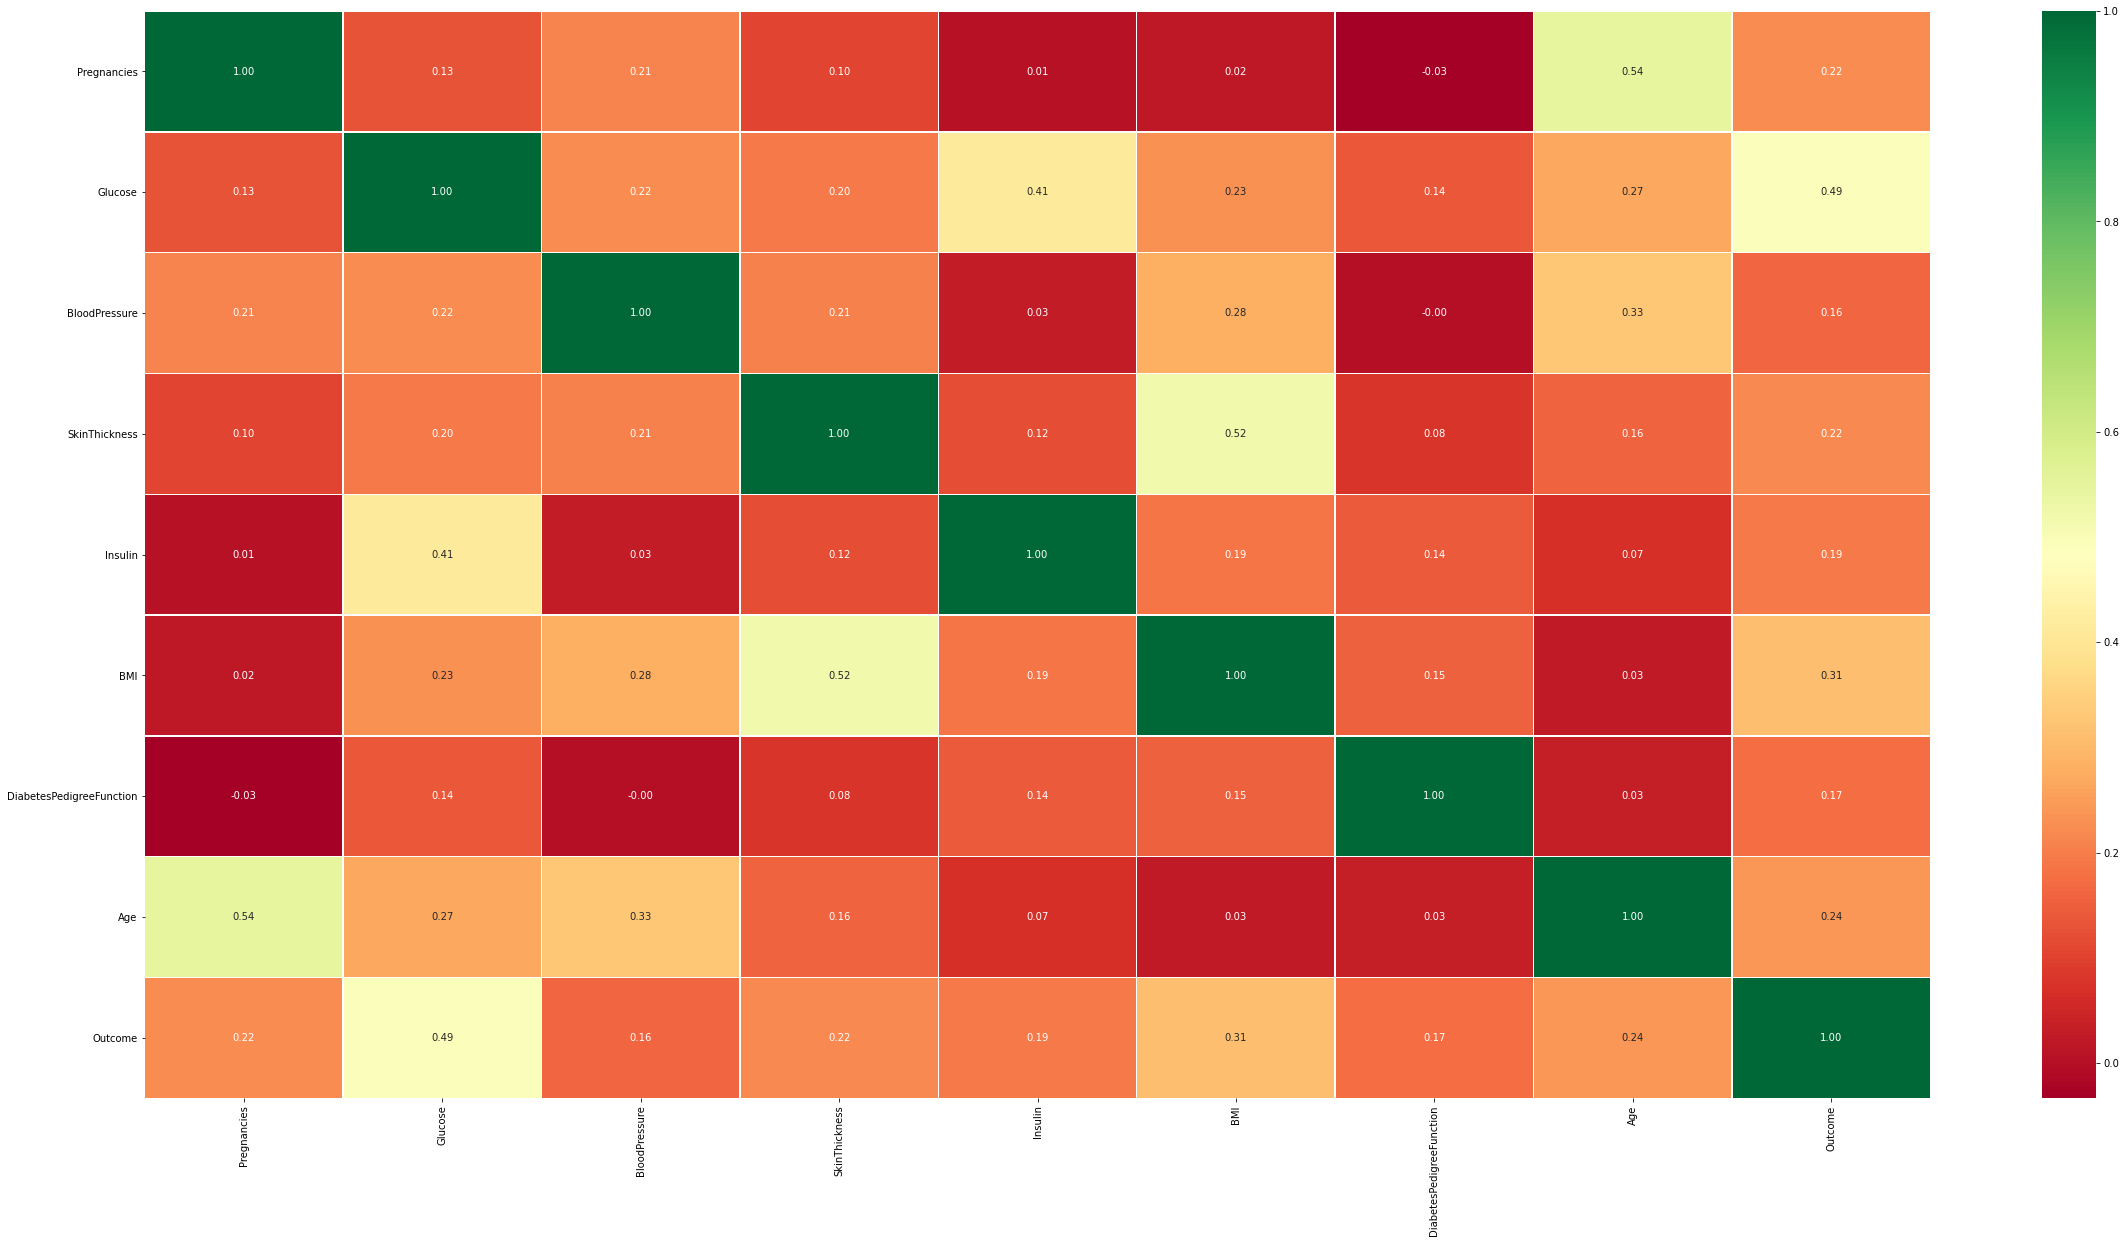

In [11]:
corr = dataset.corr()
sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

In [12]:
X = dataset.iloc[:,:8].values
y = dataset.iloc[:,8].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [42]:
acc={}
a=[]


# Logistic Regression

In [43]:
# LOGISTIC REGRESSION

lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred)
a.append(acc_lr)

acc['Logistic Regression']=accuracy_score(y_test, y_pred) * 100
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, y_pred))


Logistic Regression Accuracy: 73.59%
Logistic Regression AUC: 68.54%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       0.75      0.87      0.81       147
           1       0.69      0.50      0.58        84

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.72       231



[[128  19]
 [ 42  42]]


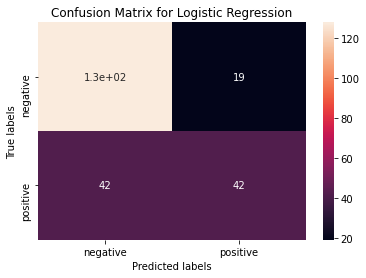

In [17]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# SVM

In [44]:
# SVM ALGORITHM 

svclassifier = SVC(kernel='linear',C=10,gamma=100)  
svc=svclassifier.fit(X_train, y_train)  

y_pred = svclassifier.predict(X_test)
acc_svc=accuracy_score(y_test,y_pred)
a.append(acc_svc)
acc['SVM']=accuracy_score(y_test, y_pred) * 100

print('\nSVM Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('SVM AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('SVM Classification report:\n\n', classification_report(y_test, y_pred))


SVM Accuracy: 73.59%
SVM AUC: 68.28%
SVM Classification report:

               precision    recall  f1-score   support

           0       0.75      0.88      0.81       147
           1       0.69      0.49      0.57        84

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



[[129  18]
 [ 43  41]]


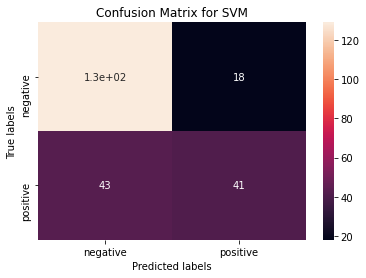

In [19]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# Naive Bayes

In [45]:
# NAIVE BAYES

nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
acc_nb=accuracy_score(y_test,y_pred)
a.append(acc_nb)
acc['NAIVE BAYES']=accuracy_score(y_test, y_pred) * 100

print('\nNAIVE BAYES Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('NAIVE BAYES AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('NAIVE BAYES Classification report:\n\n', classification_report(y_test, y_pred))


NAIVE BAYES Accuracy: 72.73%
NAIVE BAYES AUC: 68.88%
NAIVE BAYES Classification report:

               precision    recall  f1-score   support

           0       0.76      0.83      0.79       147
           1       0.65      0.55      0.59        84

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



[[122  25]
 [ 38  46]]


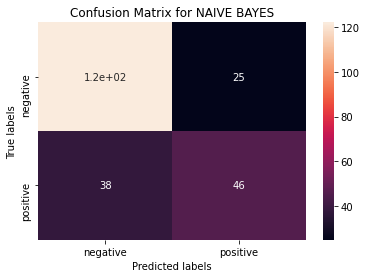

In [21]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for NAIVE BAYES'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# KNearestNeighbor

In [46]:
knn=KNeighborsClassifier(n_neighbors=4,p=2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred)
a.append(acc_knn)
acc['KNN']=accuracy_score(y_test, y_pred) * 100

print('\nKNN Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('KNN AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('KNN Classification report:\n\n', classification_report(y_test, y_pred))


KNN Accuracy: 71.43%
KNN AUC: 64.54%
KNN Classification report:

               precision    recall  f1-score   support

           0       0.72      0.90      0.80       147
           1       0.69      0.39      0.50        84

    accuracy                           0.71       231
   macro avg       0.70      0.65      0.65       231
weighted avg       0.71      0.71      0.69       231



# Accuracy Graph

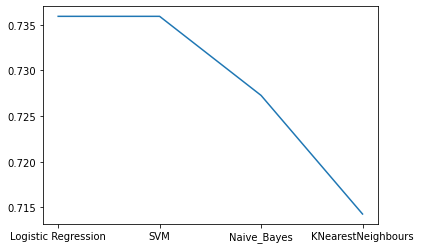

In [78]:

x_axis=['Logistic Regression', 'SVM', 'Naive_Bayes','KNearestNeighbours']
plt.plot(x_axis,a)
